In [1]:
from keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


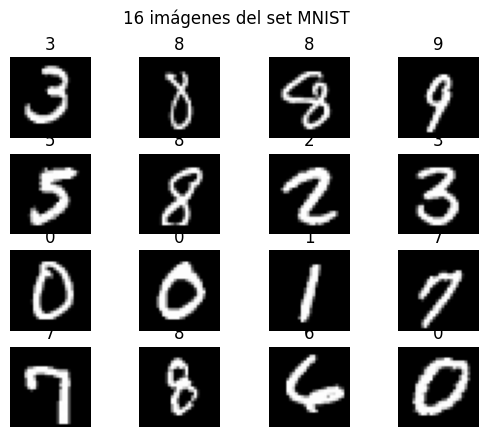

In [3]:
import matplotlib.pyplot as plt
import numpy as np

ids_imgs = np.random.randint(0,x_train.shape[0],16)
for i in range(len(ids_imgs)):
	img = x_train[ids_imgs[i],:,:]
	plt.subplot(4,4,i+1)
	plt.imshow(img, cmap='gray')
	plt.axis('off')
	plt.title(y_train[ids_imgs[i]])
plt.suptitle('16 imágenes del set MNIST')
plt.show()

In [4]:
X_train = np.reshape( x_train, (x_train.shape[0],x_train.shape[1]*x_train.shape[2]) )
X_test = np.reshape( x_test, (x_test.shape[0],x_test.shape[1]*x_test.shape[2]) )

In [5]:
X_train = X_train/255.0
X_test = X_test/255.0

In [6]:
from tensorflow.keras.utils import to_categorical

nclasses = 10
Y_train = to_categorical(y_train, nclasses)
Y_test = to_categorical(y_test, nclasses)

In [7]:
np.random.seed(1)

In [8]:
input_dim = X_train.shape[1]
output_dim = Y_train.shape[1]

In [9]:
from keras.models import Sequential

modelo = Sequential()

In [10]:
from keras.layers import Dense

modelo.add( Dense(20, input_dim=input_dim, activation='relu'))
modelo.add( Dense(output_dim, activation='softmax'))

c:\Users\delahozce\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
modelo.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 20)             │        15,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,910 (62.15 KB)

 Trainable params: 15,910 (62.15 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
from keras.optimizers import SGD

# Use learning_rate instead of lr
sgd = SGD(learning_rate=0.2)
modelo.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [13]:
num_epochs = 50

In [14]:
batch_size = 1024
historia = modelo.fit(X_train, Y_train, epochs=num_epochs, batch_size=batch_size, verbose=2)

Epoch 1/50
59/59 - 1s - 15ms/step - accuracy: 0.7323 - loss: 0.9659
Epoch 2/50
59/59 - 0s - 5ms/step - accuracy: 0.8813 - loss: 0.4266
Epoch 3/50
59/59 - 0s - 4ms/step - accuracy: 0.8987 - loss: 0.3613
Epoch 4/50
59/59 - 0s - 5ms/step - accuracy: 0.9061 - loss: 0.3310
Epoch 5/50
59/59 - 0s - 4ms/step - accuracy: 0.9110 - loss: 0.3127
Epoch 6/50
59/59 - 0s - 3ms/step - accuracy: 0.9154 - loss: 0.2995
Epoch 7/50
59/59 - 0s - 3ms/step - accuracy: 0.9173 - loss: 0.2880
Epoch 8/50
59/59 - 0s - 4ms/step - accuracy: 0.9207 - loss: 0.2787
Epoch 9/50
59/59 - 0s - 4ms/step - accuracy: 0.9228 - loss: 0.2713
Epoch 10/50
59/59 - 0s - 4ms/step - accuracy: 0.9253 - loss: 0.2635
Epoch 11/50
59/59 - 0s - 4ms/step - accuracy: 0.9266 - loss: 0.2578
Epoch 12/50
59/59 - 0s - 4ms/step - accuracy: 0.9290 - loss: 0.2518
Epoch 13/50
59/59 - 0s - 4ms/step - accuracy: 0.9295 - loss: 0.2458
Epoch 14/50
59/59 - 0s - 4ms/step - accuracy: 0.9317 - loss: 0.2411
Epoch 15/50
59/59 - 0s - 4ms/step - accuracy: 0.9329 - l

Text(0.5, 0, 'Iteración')

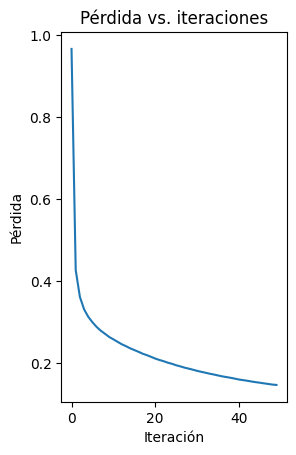

In [15]:
plt.subplot(1,2,1)
plt.plot(historia.history['loss'])
plt.title('Pérdida vs. iteraciones')
plt.ylabel('Pérdida')
plt.xlabel('Iteración')

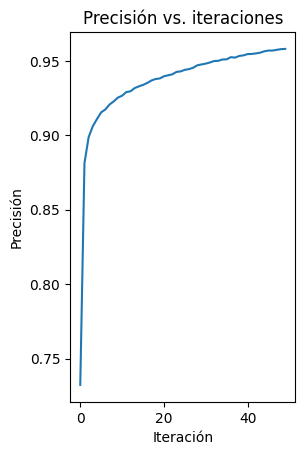

In [16]:
plt.subplot(1,2,2)
plt.plot(historia.history['accuracy'])
plt.title('Precisión vs. iteraciones')
plt.ylabel('Precisión')
plt.xlabel('Iteración')
plt.show()

In [17]:
puntaje = modelo.evaluate(X_test,Y_test,verbose=0)
print('Exactitud en el set de validación: {:.1f}%'.format(100*puntaje[1]))

Exactitud en el set de validación: 95.2%


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


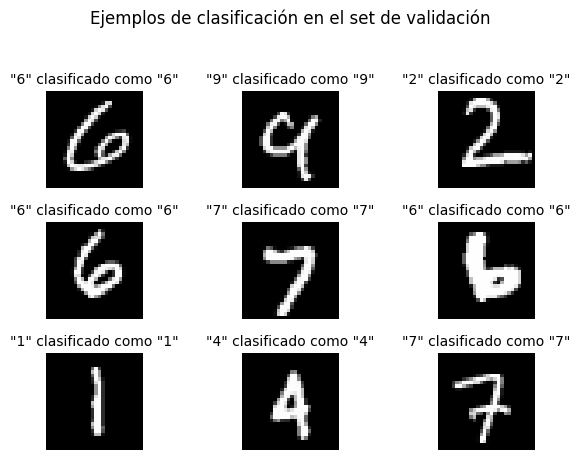

In [18]:
# Realizar predicciones con el modelo
Y_pred = modelo.predict(X_test)  # Esto devuelve las probabilidades para cada clase

# Convertir las predicciones en clases
Y_pred_classes = np.argmax(Y_pred, axis=1)

# Selección de 9 imágenes aleatorias para visualización
ids_imgs = np.random.choice(range(X_test.shape[0]), 9, replace=False)
for i in range(len(ids_imgs)):
    idx = ids_imgs[i]
    img = X_test[idx, :].reshape(28, 28)
    cat_original = np.argmax(Y_test[idx, :])
    cat_prediccion = Y_pred_classes[idx]

    plt.subplot(3, 3, i + 1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title('"{}" clasificado como "{}"'.format(cat_original, cat_prediccion), fontsize=10)

plt.suptitle('Ejemplos de clasificación en el set de validación')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Ajusta los espacios para que el título no se sobreponga
plt.show()
